On first run to get data run the `download_data` notebook with a python kernel. This is a workaround to get data from kaggle without installing custom R libraries (which didn't work in the end). After you got the data change to the R Kernel for the notebook.

In [1]:
install.packages("gender")
install.packages("remotes")
remotes::install_github("lmullen/genderdata")
install.packages("recommenderlab")

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Skipping install of 'genderdata' from a github remote, the SHA1 (df160171) has not changed since last install.
  Use `force = TRUE` to force installation

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)



In [2]:
library("tidyverse")
library("ggplot2")
library("knitr")
library("gender")
library("genderdata")
library("recommenderlab")

Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_unnamed’ by ‘rlang::check_dots_unnamed’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_used’ by ‘rlang::check_dots_used’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_empty’ by ‘rlang::check_dots_empty’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘hms’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_unnamed’ by ‘rlang::check_dots_unnamed’ when loading ‘hms’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_used’ by ‘rlang::check_dots_used’ when loading ‘hms’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_empty’ by ‘rlang::check_dots_empty’ when loading ‘hms’”
── Attaching packa

# Data import

In [3]:
# Excludes for speed
# For first run enable it
#books <- list.files("data", pattern = "book.*.csv", full.names = TRUE) %>%
#  lapply(read_csv) %>%
#  bind_rows
# user_ratings <- list.files("data", pattern = "user_rating_.*.csv", full.names = TRUE) %>%
#   lapply(read_csv) %>%
#   bind_rows
#nrow(books)

# Data processing

## Books Dataset

This section will process the dataset books*.csv.

In [4]:
# Excludes for speed
# For first run enable it
#nrow(books)
#books_clean <- separate(books, RatingDistTotal, sep = ":", convert = TRUE, into = c("dump", "RatingDistTotal")) %>%
#                select(-dump) %>%
#                filter(Language == "en-US")

#dist_clean <- function(df, dist) {
#    df <- separate(books, RatingDist, sep = ":", into = c("dump", "RatingDist1")) %>%
#}

# Refactor RatingDist*
#books_clean2 <- separate(books, RatingDist1, sep = ":", into = c("dump", "RatingDist1")) %>%
#               separate(books, RatingDist2, sep = ":", into = c("dump", "RatingDist2")) %>%
#               separate(books, RatingDist3, sep = ":", into = c("dump", "RatingDist3")) %>%
#               separate(books, RatingDist4, sep = ":", into = c("dump", "RatingDist4")) %>%
#              separate(books, RatingDist5, sep = ":", into = c("dump", "RatingDist5")) %>%
 
#nrow(books_clean)

Exclude authors with initials in their name

In [5]:
#nrow(books_clean)
#books_clean <- books_clean %>% filter(!str_detect(Authors, ".*[:punct:].*"))
#nrow(books_clean)
# Store cleaned data in new csv
#write.csv(books_clean, "book_clean.csv", row.names = FALSE)

In [6]:
# This a helping function to not always have to process all of the data.
books_clean <- read_csv("book_clean.csv")
head(books_clean)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  Id = col_double(),
  pagesNumber = col_double(),
  RatingDistTotal = col_double(),
  PublishMonth = col_double(),
  PublishDay = col_double(),
  CountsOfReview = col_double(),
  PublishYear = col_double(),
  Rating = col_double(),
  Description = col_logical(),
  `Count of text reviews` = col_logical(),
  PagesNumber = col_logical()
)
ℹ Use `spec()` for the full column specifications.

Warning message:
“17243 parsing failures.
 row                   col           expected                                                                                                                                                                                                                                                                                                                                                                                                                    

Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,⋯,Language,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews,PagesNumber
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>
55,Hatchet Jobs: Writings on Contemporary Fiction,1:10,228,4:43,123,1,11,The New Press,16,⋯,en-US,Dale Peck,3.46,2:10,5:22,1595580271,3:38,NA,NA,NA
75,Uncommon Carriers,1:21,248,4:861,1895,16,5,Farrar Straus Giroux,203,⋯,en-US,John McPhee,3.95,2:75,5:529,0374280398,3:409,NA,NA,NA
77,The Control of Nature,1:25,288,4:1458,3747,1,9,"Farrar, Straus and Giroux",305,⋯,en-US,John McPhee,4.24,2:88,5:1671,0374522596,3:505,NA,NA,NA
90,Simply Beautiful Beaded Jewelry,1:1,128,4:22,64,14,3,North Light Books,4,⋯,en-US,Heidi Boyd,3.77,2:5,5:17,1581807740,3:19,NA,NA,NA
92,Mapping the Big Picture: Integrating Curriculum & Assessment K-12,1:3,108,4:23,77,28,1,Association for Supervision & Curriculum Development,2,⋯,en-US,Heidi Hayes Jacobs,3.66,2:4,5:19,0871202867,3:28,NA,NA,NA
100,Simply Beautiful Beading: 53 Quick and Easy Projects,1:0,128,4:30,86,19,8,North Light Books,4,⋯,en-US,Heidi Boyd,3.78,2:9,5:23,1581805632,3:24,NA,NA,NA


Split authors names into first, middle and last name

In [7]:
# Function to split names
# https://www.r-bloggers.com/2019/10/split-intermixed-names-into-first-middle-and-last/
fml <- function(mangled_names) {
  titles <- c("MASTER", "MR", "MISS", "MRS", "MS", 
              "MX", "JR", "SR", "M", "SIR", "GENTLEMAN", 
              "SIRE", "MISTRESS", "MADAM", "DAME", "LORD", 
              "LADY", "ESQ", "EXCELLENCY","EXCELLENCE", 
              "HER", "HIS", "HONOUR", "THE", 
              "HONOURABLE", "HONORABLE", "HON", "JUDGE")
  mangled_names %>% sapply(function(name) {
    split <- str_split(name, " ") %>% unlist
    original_length <- length(split)
    split <- split[which(!split %>% 
                           toupper %>% 
                           str_replace_all('[^A-Z]','')
                         %in% titles)]
    case_when(
      (length(split) < original_length) & 
        (length(split) == 1) ~  c(NA,
                                  NA,
                                  split[1]),
      length(split) == 1 ~ c(split[1],NA,NA),
      length(split) == 2 ~ c(split[1],NA,
                             split[2]),
      length(split) == 3 ~ c(split[1],
                             split[2],
                             split[3]),
      length(split) > 3 ~ c(split[1],
                            paste(split[2:(length(split)-1)],
                                  collapse = "-"),
                            split[length(split)])
    )
  }) %>% t %>% return
}

In [8]:
books_clean %>%
    add_column(FirstName = NA) %>%
    add_column(MiddleName = NA) %>%
    add_column(LastName = NA)

books_clean[,c("FirstName","MiddleName","LastName")] <-  books_clean$Authors %>% fml

Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,⋯,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews,PagesNumber,FirstName,MiddleName,LastName
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
55,Hatchet Jobs: Writings on Contemporary Fiction,1:10,228,4:43,123,1,11,The New Press,16,⋯,2:10,5:22,1595580271,3:38,NA,NA,NA,NA,NA,NA
75,Uncommon Carriers,1:21,248,4:861,1895,16,5,Farrar Straus Giroux,203,⋯,2:75,5:529,0374280398,3:409,NA,NA,NA,NA,NA,NA
77,The Control of Nature,1:25,288,4:1458,3747,1,9,"Farrar, Straus and Giroux",305,⋯,2:88,5:1671,0374522596,3:505,NA,NA,NA,NA,NA,NA
90,Simply Beautiful Beaded Jewelry,1:1,128,4:22,64,14,3,North Light Books,4,⋯,2:5,5:17,1581807740,3:19,NA,NA,NA,NA,NA,NA
92,Mapping the Big Picture: Integrating Curriculum & Assessment K-12,1:3,108,4:23,77,28,1,Association for Supervision & Curriculum Development,2,⋯,2:4,5:19,0871202867,3:28,NA,NA,NA,NA,NA,NA
100,Simply Beautiful Beading: 53 Quick and Easy Projects,1:0,128,4:30,86,19,8,North Light Books,4,⋯,2:9,5:23,1581805632,3:24,NA,NA,NA,NA,NA,NA
107,Dreamer of Dune: The Biography of Frank Herbert,1:18,592,4:275,849,1,7,Tor Books,21,⋯,2:42,5:329,0765306476,3:185,NA,NA,NA,NA,NA,NA
139,ebay Timesaving Techniques for Dummies,1:1,391,4:4,23,31,5,Wiley,1,⋯,2:5,5:6,0764559915,3:7,NA,NA,NA,NA,NA,NA
140,eBay Business All-in-One Desk Reference for Dummies,1:1,864,4:9,18,25,4,Wiley,3,⋯,2:1,5:5,0764584383,3:2,NA,NA,NA,NA,NA,NA


In [9]:
nrow(books_clean)
# Drop authors with no first name
books_clean <- books_clean %>% drop_na(FirstName)
nrow(books_clean)
# Drop authors with less then 100 total ratings
books_clean <- filter(books_clean,RatingDistTotal >= 100)
nrow(books_clean)
head(books_clean)

[1] 17174

[1] 17152

[1] 12599

Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,⋯,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews,PagesNumber,FirstName,MiddleName,LastName
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>
55,Hatchet Jobs: Writings on Contemporary Fiction,1:10,228,4:43,123,1,11,The New Press,16,⋯,2:10,5:22,1595580271,3:38,NA,NA,NA,Dale,NA,Peck
75,Uncommon Carriers,1:21,248,4:861,1895,16,5,Farrar Straus Giroux,203,⋯,2:75,5:529,0374280398,3:409,NA,NA,NA,John,NA,McPhee
77,The Control of Nature,1:25,288,4:1458,3747,1,9,"Farrar, Straus and Giroux",305,⋯,2:88,5:1671,0374522596,3:505,NA,NA,NA,John,NA,McPhee
107,Dreamer of Dune: The Biography of Frank Herbert,1:18,592,4:275,849,1,7,Tor Books,21,⋯,2:42,5:329,0765306476,3:185,NA,NA,NA,Brian,NA,Herbert
165,Untouchables: My Family's Triumphant Journey Out of the Caste System in Modern India,1:4,320,4:142,357,27,9,Scribner,40,⋯,2:22,5:90,0743270797,3:99,NA,NA,NA,Narendra,NA,Jadhav
207,Long Way Round: Chasing Shadows Across the World,1:156,320,4:3645,9348,1,11,Atria Books,44,⋯,2:432,5:2973,0743499344,3:2142,NA,NA,NA,Ewan,NA,McGregor


### Gender Prediction

In [10]:
name <- unique(books_clean$FirstName)
consolidated <- data.frame(all_names = as.character(as.vector(as.matrix(name))))
genderpred <- gender(consolidated$all_names)
books_clean <- books_clean %>%
  right_join(genderpred, by = c("FirstName" = "name")) %>%
  select(-c(proportion_male,proportion_female,year_min,year_max))
head(books_clean %>% select(Name, FirstName, gender))
nrow(books_clean)

Name,FirstName,gender
<chr>,<chr>,<chr>
Hatchet Jobs: Writings on Contemporary Fiction,Dale,male
Uncommon Carriers,John,male
The Control of Nature,John,male
Dreamer of Dune: The Biography of Frank Herbert,Brian,male
Long Way Round: Chasing Shadows Across the World,Ewan,male
The Ravishing of Lol Stein,Marguerite,female


[1] 12044

Encode gender
| gender|code|
|:-----:|:--:|
|female | 1  |
|male   | 0  |

In [11]:
books_clean <- books_clean %>%
    add_column(gender_enc = NA)

# Recoding with mutate and recode didn't work
books_clean$gender_enc[books_clean$gender == "female"] <- 1
books_clean$gender_enc[books_clean$gender == "male"] <- 0

head(books_clean %>% select(Name, FirstName, gender, gender_enc))

Name,FirstName,gender,gender_enc
<chr>,<chr>,<chr>,<dbl>
Hatchet Jobs: Writings on Contemporary Fiction,Dale,male,0
Uncommon Carriers,John,male,0
The Control of Nature,John,male,0
Dreamer of Dune: The Biography of Frank Herbert,Brian,male,0
Long Way Round: Chasing Shadows Across the World,Ewan,male,0
The Ravishing of Lol Stein,Marguerite,female,1


In [12]:
nrow(books_clean)
books_clean %>%
    count(gender)

[1] 12044

,gender,n
,<chr>,<int>
1,female,5422
2,male,6622


The data processing leaves us with 12044 valid cases.

In [13]:
# Function to plot and save gender distribution
plot_gender_dist <- function(tmp_recommendations_df, plotname) {
    tmp_plotname <- paste(plotname, "_distrstribution_authors_itembased.png")
    tmp_title <- paste("Distribution Authors (", plotname, ")")
    plot <- tmp_recommendations_df %>% 
        ggplot(aes(x = gender, fill = gender)) + 
        geom_bar() +
        theme(panel.background = element_rect(size = 0.5, linetype = 'solid'),
            panel.grid.minor= element_blank(),
            panel.grid.major.x = element_blank(),
            axis.text.x=element_blank(),
            axis.title.x=element_blank(), 
            plot.title = element_text(hjust= 0.5)) +
            labs(title = tmp_title, y = "Number of Authors") +
        scale_fill_manual(values=c("female"="#1ed7be","male"="#19bbd5"))
        ggsave(tmp_plotname)
    print(plot)
}

Saving 6.67 x 6.67 in image



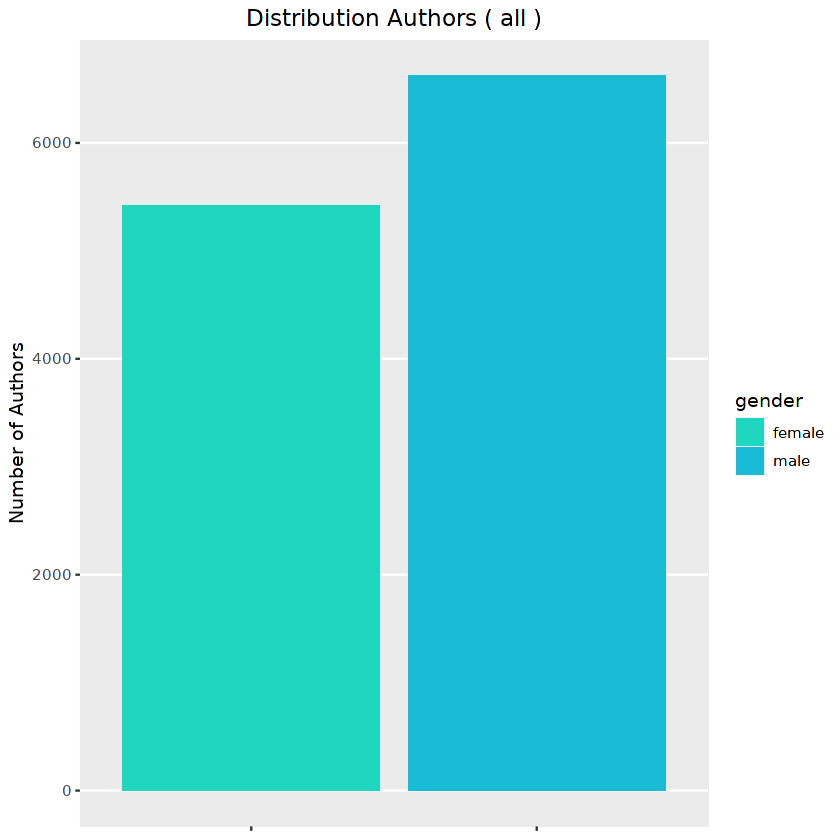

In [14]:
plot_gender_dist(books_clean, "all")

In [15]:
summary(books_clean)

       Id              Name           RatingDist1         pagesNumber    
 Min.   :     55   Length:12044       Length:12044       Min.   :   0.0  
 1st Qu.: 229516   Class :character   Class :character   1st Qu.: 176.0  
 Median : 674275   Mode  :character   Mode  :character   Median : 288.0  
 Mean   :1031462                                         Mean   : 295.7  
 3rd Qu.:1450914                                         3rd Qu.: 384.0  
 Max.   :4842292                                         Max.   :3200.0  
                                                         NA's   :2437    
 RatingDist4        RatingDistTotal    PublishMonth      PublishDay    
 Length:12044       Min.   :    100   Min.   : 1.000   Min.   : 1.000  
 Class :character   1st Qu.:    331   1st Qu.: 1.000   1st Qu.: 3.000  
 Mode  :character   Median :   1058   Median : 7.000   Median : 7.000  
                    Mean   :  18138   Mean   : 9.767   Mean   : 7.372  
                    3rd Qu.:   4495   3rd Qu.:15

## User rating Dataset

In [16]:
user_ratings <- list.files("data", pattern = "user_rating_.*.csv", full.names = TRUE) %>%
   lapply(read_csv) %>%
   bind_rows


── Column specification ────────────────────────────────────────────────────────
cols(
  ID = col_double(),
  Name = col_character(),
  Rating = col_character()
)


── Column specification ────────────────────────────────────────────────────────
cols(
  ID = col_double(),
  Name = col_character(),
  Rating = col_character()
)


── Column specification ────────────────────────────────────────────────────────
cols(
  ID = col_double(),
  Name = col_character(),
  Rating = col_character()
)


── Column specification ────────────────────────────────────────────────────────
cols(
  ID = col_double(),
  Name = col_character(),
  Rating = col_character()
)


── Column specification ────────────────────────────────────────────────────────
cols(
  ID = col_double(),
  Name = col_character(),
  Rating = col_character()
)


── Column specification ────────────────────────────────────────────────────────
cols(
  ID = col_double(),
  Name = col_character(),
  Rating = col_character()
)


── Column

In [17]:
nrow(user_ratings)
user_ratings <- user_ratings %>%
    filter(!Rating == "This user doesn't have any rating")
nrow(user_ratings)

[1] 362596

[1] 357831

Ordinalisierung
|  |  |
|--|--|
|it was amazing|5|
|really liked it|4|
|liked it|3|
|it was okay|2|
|did not like it|1|
| else | NA |


In [18]:
user_ratings$Rating[user_ratings$Rating == "it was amazing"] <- 5
user_ratings$Rating[user_ratings$Rating == "really liked it"] <- 4
user_ratings$Rating[user_ratings$Rating == "liked it"] <- 3
user_ratings$Rating[user_ratings$Rating == "it was ok"] <- 2
user_ratings$Rating[user_ratings$Rating == "did not like it"] <- 1
user_ratings[, 3] <- sapply(user_ratings[, 3], as.numeric)
head(user_ratings)

ID,Name,Rating
<dbl>,<chr>,<dbl>
1,Agile Web Development with Rails: A Pragmatic Guide,5
1,"The Restaurant at the End of the Universe (Hitchhiker's Guide to the Galaxy, #2)",5
1,Siddhartha,5
1,The Clock of the Long Now: Time and Responsibility,4
1,"Ready Player One (Ready Player One, #1)",4
1,"The Hunger Games (The Hunger Games, #1)",5


Filter the user_ratings with the books we also have in the books dataset, as we can only predict the gender based on the first dataset. Therefore books in the user_ratings dataset, which will not occur in the books set will not be included in the analysis.

In [19]:
unique_booknames <- unique(books_clean$Name)
print(paste("Unique books in books dataset: ", length(unique_booknames)))
print(paste("User_ratings before: ",nrow(user_ratings)))
user_ratings <- user_ratings %>%
    filter(Name %in% unique_booknames)

print(paste("User_ratings after: ",nrow(user_ratings)))

[1] "Unique books in books dataset:  11497"
[1] "User_ratings before:  357831"
[1] "User_ratings after:  39509"


In [20]:
summary(user_ratings)

       ID            Name               Rating     
 Min.   :    1   Length:39509       Min.   :1.000  
 1st Qu.: 2044   Class :character   1st Qu.:3.000  
 Median : 4700   Mode  :character   Median :4.000  
 Mean   : 4968                      Mean   :3.773  
 3rd Qu.: 7816                      3rd Qu.:5.000  
 Max.   :10988                      Max.   :5.000  

# Recommender System

## Simple weight-based filtering

$$WR = \frac{(R * v) + (C*m) }{v + m}$$

$$R$$ is the average ration of the book

$$v$$ is the number of rating of the book

$$C$$ is the mean rating

$$m$$ is th eminim ratings required to be listed

This formula is/was used by IMDB for their Top Rated 250 Titles

In [21]:
v <- books_clean$RatingDistTotal
m <- quantile(books_clean$RatingDistTotal,probs =  c(.98), na.rm = TRUE)
R <- books_clean$Rating
C <- mean(books_clean$Rating)
books_clean <- mutate(books_clean, weighted_Rating = (R*v + C*m) / (v + m))
# Sort by weighted_Rating and add rank
books_clean <- books_clean %>%
    arrange(desc(weighted_Rating)) %>%
    mutate(rank = 1:n())


Top 10

In [22]:
head(books_clean %>% select(rank, Name, weighted_Rating), n = 10)

rank,Name,weighted_Rating
<int>,<chr>,<dbl>
1,The Book Thief,4.329033
2,A Thousand Splendid Suns,4.317989
3,A Thousand Splendid Suns,4.308618
4,To Kill a Mockingbird,4.266292
5,Night,4.265465
6,"Ender's Game (Ender's Saga, #1)",4.247944
7,"Ender's Game (Ender's Saga, #1)",4.247179
8,Gone with the Wind,4.245258
9,Matilda,4.228482


In [23]:
# Function to test top n authors
test_top <- function(n) {
    top <- head(arrange(books_clean, desc(weighted_Rating)), n = n)
    x <- top$rank
    y <- top$gender
    print(top %>% count(gender))
    print(t.test(x~y, var.equal = TRUE, alternative = "less"))
    plot_gender_dist(top, paste("Top ", n)) 
}

### Top 10

# A tibble: 2 x 2
  gender     n
* <chr>  <int>
1 female     2
2 male       8

	Two Sample t-test

data:  x by y
t = 0.24712, df = 8, p-value = 0.5945
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 5.328034
sample estimates:
mean in group female   mean in group male 
               6.000                5.375 

Saving 6.67 x 6.67 in image



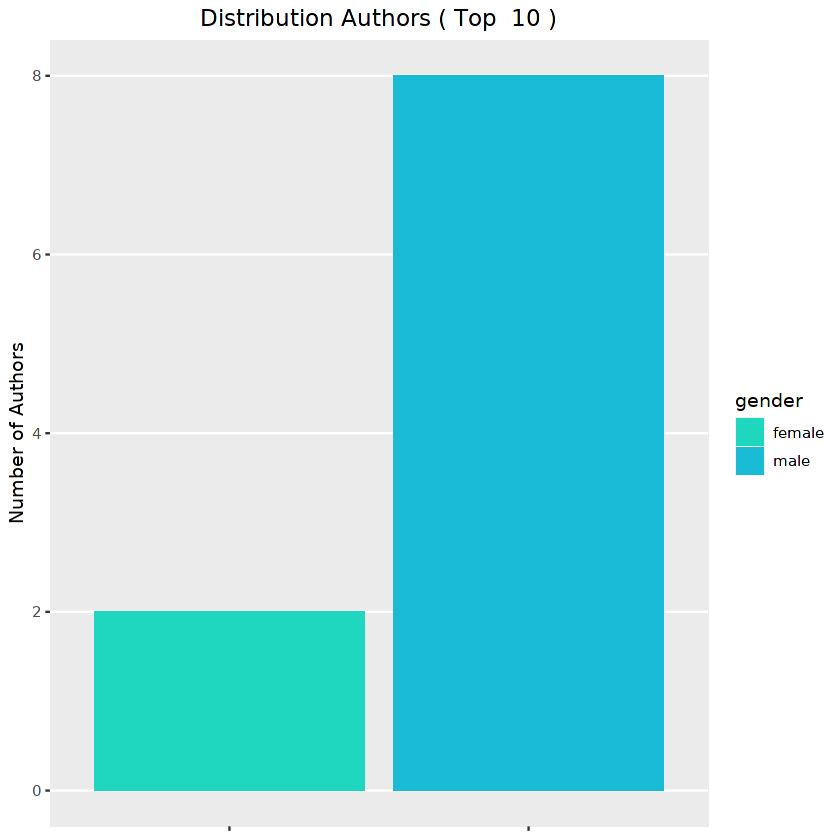

In [24]:
test_top(10)

### Top 100

# A tibble: 2 x 2
  gender     n
* <chr>  <int>
1 female    20
2 male      80

	Two Sample t-test

data:  x by y
t = -1.1654, df = 98, p-value = 0.1233
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 3.584535
sample estimates:
mean in group female   mean in group male 
             43.7500              52.1875 

Saving 6.67 x 6.67 in image



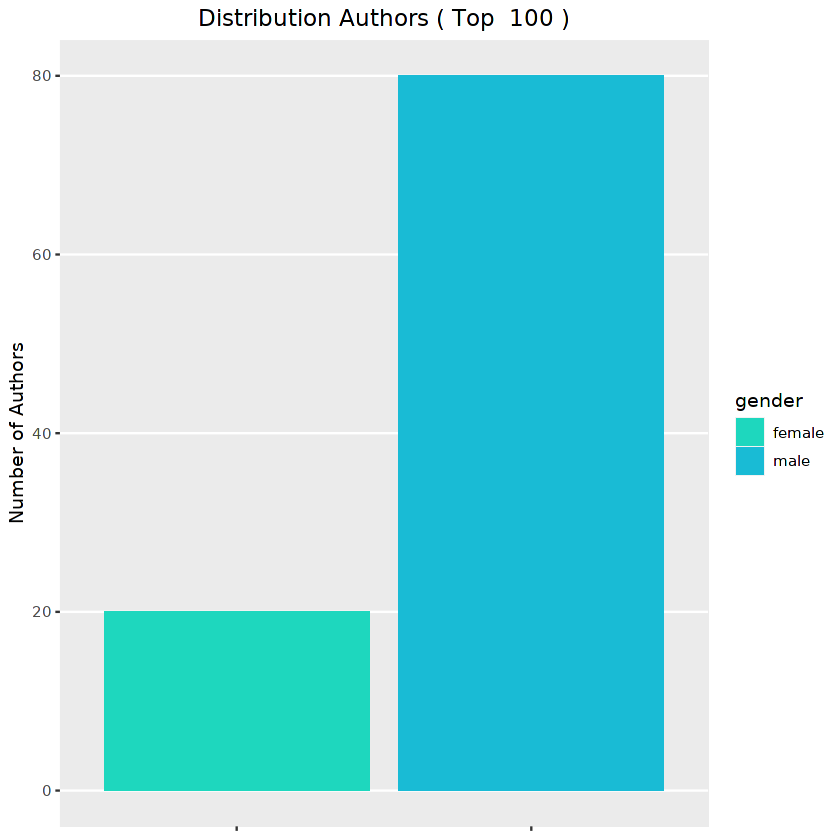

In [25]:
test_top(100)

### Top 1000

# A tibble: 2 x 2
  gender     n
* <chr>  <int>
1 female   364
2 male     636

	Two Sample t-test

data:  x by y
t = 2.2992, df = 998, p-value = 0.9891
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 74.73517
sample estimates:
mean in group female   mean in group male 
            528.1978             484.6478 

Saving 6.67 x 6.67 in image



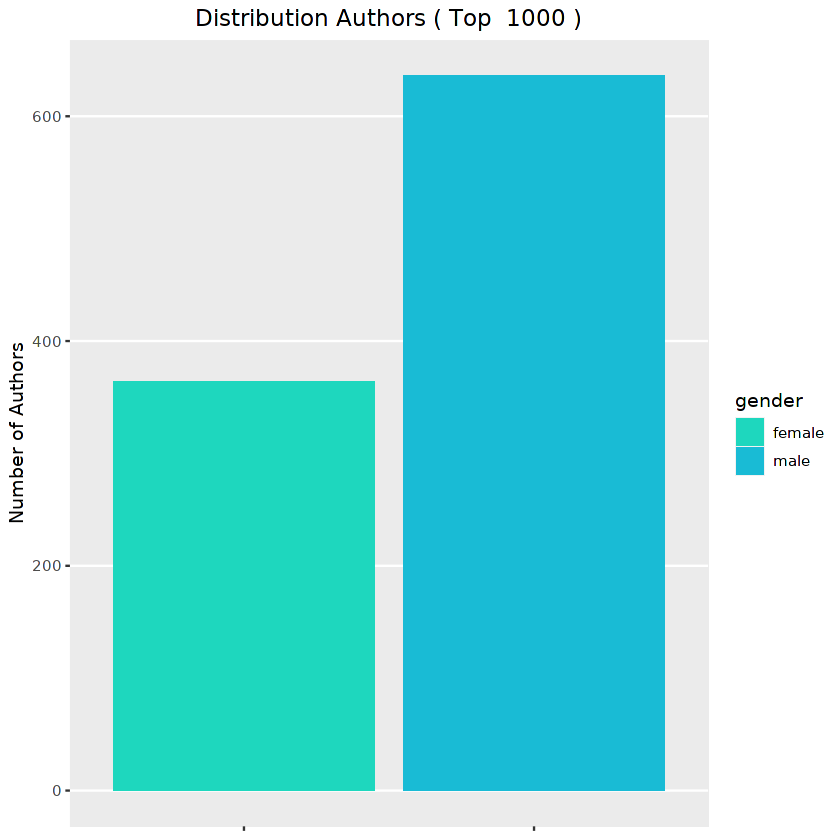

In [26]:
test_top(1000)

## Collaborative item-based filtering

Saving 6.67 x 6.67 in image



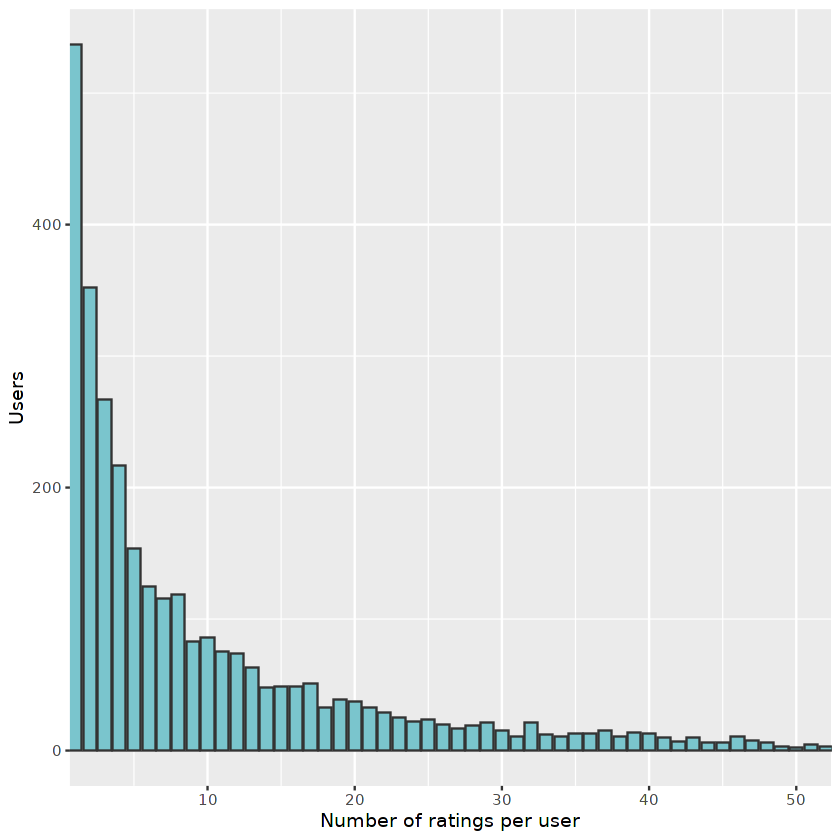

In [27]:
user_ratings %>% 
  group_by(ID) %>% 
  summarize(number_of_ratings_per_user = n()) %>% 
  ggplot(aes(number_of_ratings_per_user)) + 
  geom_bar(fill = "cadetblue3", color = "grey20") + coord_cartesian(c(3, 50)) + 
  labs(y = "Users", x = "Number of ratings per user")
  ggsave("number_of_ratings_per_user.png")



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 6.67 x 6.67 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



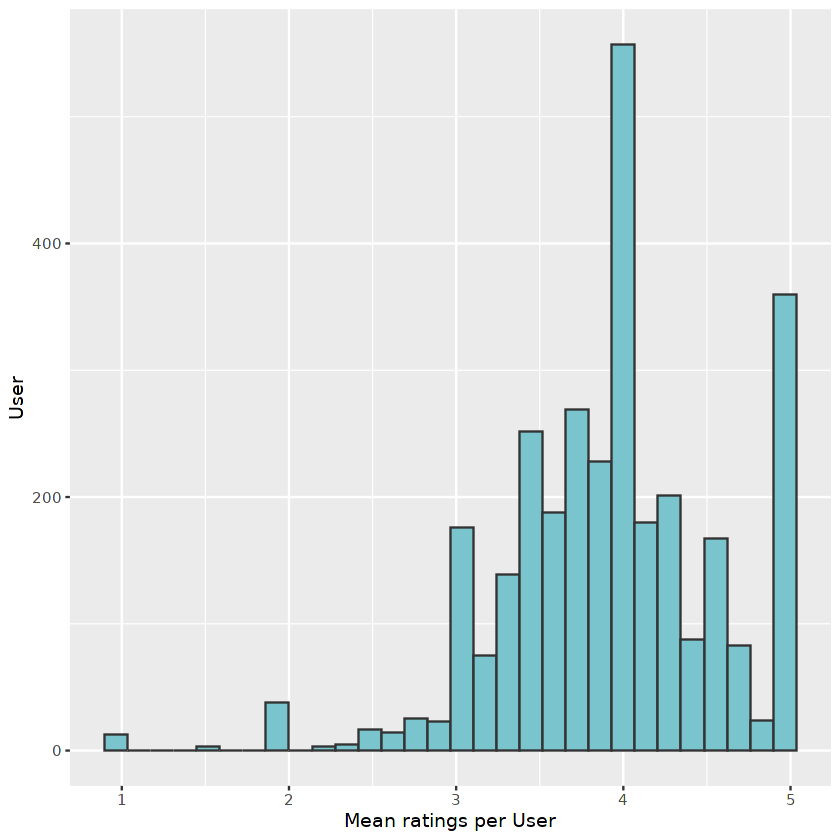

In [28]:
user_ratings %>% 
  group_by(ID) %>% 
  summarize(mean_user_rating = mean(Rating)) %>% 
  ggplot(aes(mean_user_rating)) +
  geom_histogram(fill = "cadetblue3", color = "grey20") +
  labs(y= "User", x = "Mean ratings per User")
  ggsave("mean_ratings_per_user.png")


`summarise()` has grouped output by 'ID'. You can override using the `.groups` argument.
Saving 6.67 x 6.67 in image



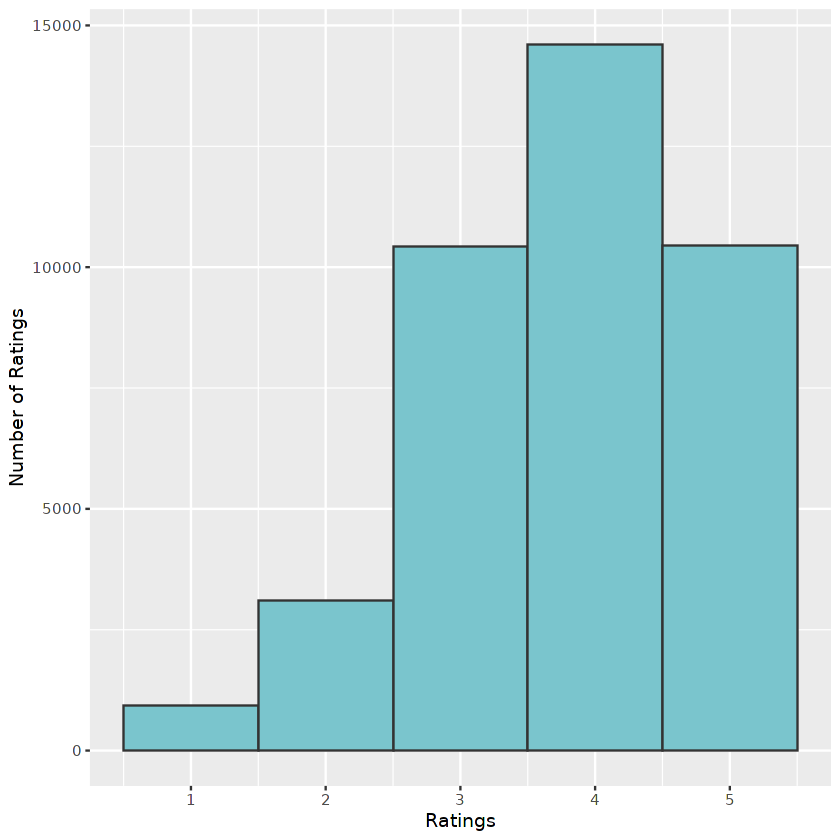

In [29]:
user_ratings %>% 
  group_by(ID) %>% 
  summarize(user_rating = Rating) %>% 
  ggplot(aes(user_rating)) +
  geom_histogram(fill = "cadetblue3", color = "grey20", binwidth = (1)) +
  labs(y= "Number of Ratings", x = "Ratings")
  ggsave("number_of_ratings.png")


In [30]:
user_ratings %>%
    group_by(Rating) %>%
    summarize(Rating = n())

,Rating
,<int>
1,927
2,3102
3,10420
4,14607
5,10453


Saving 6.67 x 6.67 in image



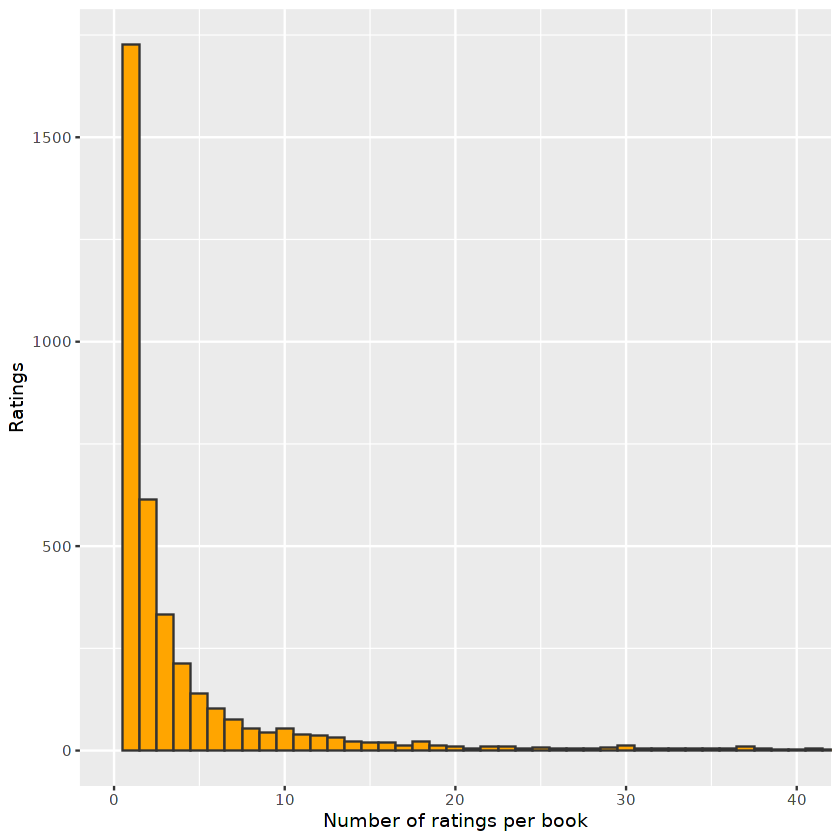

In [31]:
user_ratings %>% 
  group_by(Name) %>% 
  summarize(number_of_ratings_per_book = n()) %>% 
  ggplot(aes(number_of_ratings_per_book)) + 
  geom_bar(fill = "orange", color = "grey20", width = 1) + coord_cartesian(c(0,40)) +
  labs(y = "Ratings", x = "Number of ratings per book")
  ggsave("number_of_ratings_per_book.png")


### Recommendations

To test the recommender system we will draw three different samples with size 10000 from our population. Afterwards the recommender system will apply the algorithm on the known subset. This results in 3000 recommentations per sample.

In [32]:
set.seed(11032022)
test_sample <- sample_n(user_ratings, 10000)
test_sample2 <- sample_n(user_ratings, 10000)
test_sample3 <- sample_n(user_ratings, 10000)
head(test_sample)

ID,Name,Rating
<dbl>,<chr>,<dbl>
10706,The Brothers Karamazov,4
2828,Coronado: Stories,3
4465,Sphere,4
4357,Dewey: The Small-Town Library Cat Who Touched the World,3
1455,Snow Crash,4
7452,To Kill a Mockingbird,5


In [33]:
recommendersys <- function(f_test_sample, plotname) {
    # Create Matrix
    f_ratingmat <- f_test_sample %>%  mutate(row = row_number()) %>% pivot_wider(names_from = Name, values_from = Rating) %>% select(-ID, row)
    f_ratingmat <- as.matrix(f_ratingmat)
    f_ratingmat[1:5, 1:5]
    dim(f_ratingmat)

    # Prepare spare matrix
    f_ratingmat0 <- f_ratingmat
    f_ratingmat0[is.na(f_ratingmat0)] <- 0
    f_sparse_ratings <- as(f_ratingmat0, "sparseMatrix")
    rm(f_ratingmat0)
    gc()
    f_real_ratings <- new("realRatingMatrix", data = f_sparse_ratings)

    # Split into train/known/unkown
    e <- evaluationScheme(f_real_ratings, method="cross-validation",k = 10, train=0.8, given= -1,  goodRating=3)
    f_model <- Recommender(getData(e, "train"), method = "IBCF", param=list(normalize = NULL ,method="pearson"))
    # Predition on the known
    p <- predict(f_model, getData(e, "known"), n=5)
    as(p, "list")
    f_recommentations <- as(p, "matrix")

    # Merge datasets
    f_recommendations_df <- as.data.frame(f_recommentations)
    f_recommendations_df <- f_recommendations_df %>%
        rownames_to_column(var = "ID") %>%
        pivot_longer(!ID, names_to = "Name", values_to = "Recommended") %>%
        filter(!is.na(Recommended)) %>%
        select(-Recommended) %>%
        inner_join(books_clean %>% select(Name, gender, gender_enc))

    # Get number of gender
    print("Number of Authors (not unique)")
    print(f_recommendations_df %>% count(gender))
    # Plot distribution
    plot_gender_dist(f_recommendations_df, plotname)
    # Summarise books in single rows with counter of recommentations 
    f_final_recom <- f_recommendations_df %>%
        count(Name) %>%
        inner_join(books_clean %>% select(Name, gender)) %>%
        distinct()

    f_final_recom$gender_enc[f_final_recom$gender == "female"] <- 1
    f_final_recom$gender_enc[f_final_recom$gender == "male"] <- 0

    # Top 10 Authors
    print(head(f_final_recom %>%
    select(Name, n, gender) %>%
    arrange(desc(n)),n=10))

    # Get number of gender per book
    print("Authors per gender (unique)")
    print(f_final_recom %>% count(gender))

    # T-Test
    x <- f_final_recom$n
    y <- f_final_recom$gender_enc
    print(t.test(x~y, var.equal = TRUE, alternative = "less"))
}

### Sample 1

Joining, by = "Name"
[1] "Number of Authors (not unique)"
# A tibble: 2 x 2
  gender     n
* <chr>  <int>
1 female   703
2 male    2235
Saving 6.67 x 6.67 in image

Joining, by = "Name"
Warning message:
“Unknown or uninitialised column: `gender_enc`.”
# A tibble: 10 x 3
   Name                                                                 n gender
   <chr>                                                            <int> <chr> 
 1 Coronado: Stories                                                  508 male  
 2 The Brothers Karamazov                                             269 male  
 3 Sphere                                                             233 male  
 4 Dewey: The Small-Town Library Cat Who Touched the World            230 female
 5 Snow Crash                                                         150 male  
 6 Die Trying (Jack Reacher, #2)                                       57 male  
 7 Spook: Science Tackles the Afterlife                                46 female


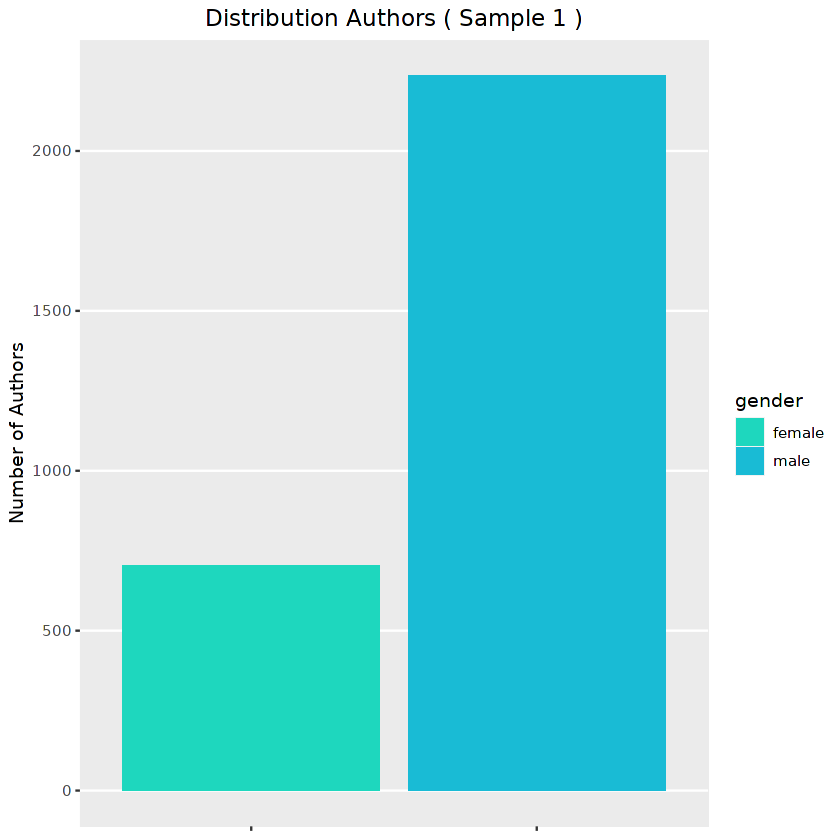

In [34]:
recommendersys(test_sample, "Sample 1")

### Sample 2

Joining, by = "Name"
[1] "Number of Authors (not unique)"
# A tibble: 2 x 2
  gender     n
* <chr>  <int>
1 female  1213
2 male    2103
Saving 6.67 x 6.67 in image

Joining, by = "Name"
Warning message:
“Unknown or uninitialised column: `gender_enc`.”
# A tibble: 10 x 3
   Name                                n gender
   <chr>                           <int> <chr> 
 1 The Poisonwood Bible              472 female
 2 Who's Afraid of Virginia Woolf?   420 male  
 3 Life of Pi                        312 male  
 4 Dubliners                         273 male  
 5 To Kill a Mockingbird             253 female
 6 Blow Fly (Kay Scarpetta, #12)      64 female
 7 Fantastic Mr. Fox                  54 male  
 8 Sabriel (Abhorsen, #1)             44 male  
 9 The House of Mirth                 44 female
10 Lucky Jim                          41 male  
[1] "Authors per gender (unique)"
# A tibble: 2 x 2
  gender     n
* <chr>  <int>
1 female    37
2 male     101

	Two Sample t-test

data:  x by y
t = -0

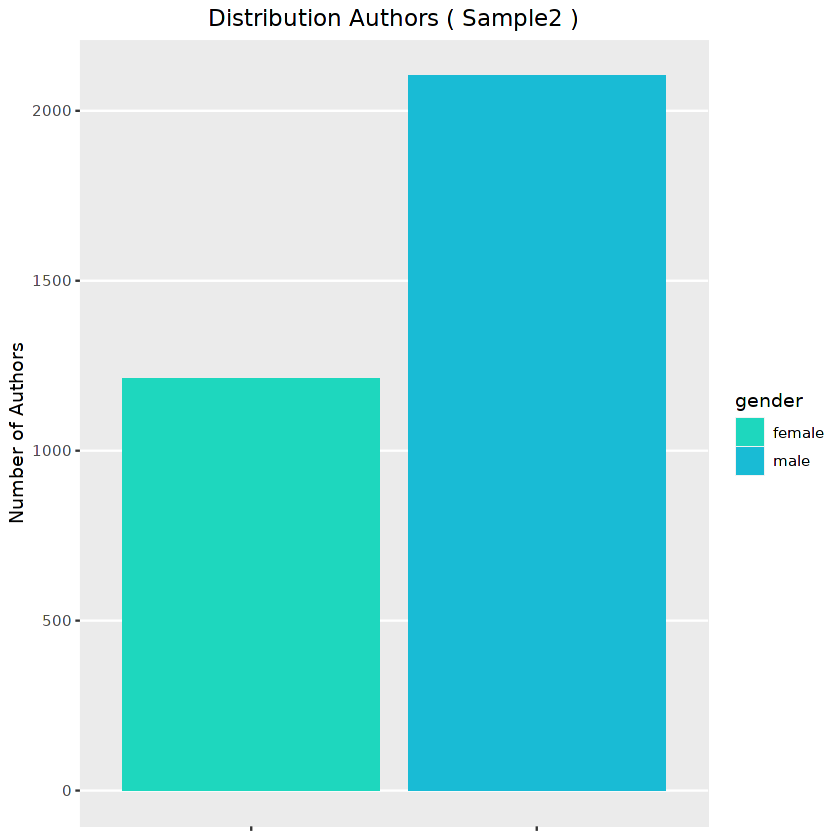

In [35]:
recommendersys(test_sample2, "Sample2")

### Sample 3

Joining, by = "Name"
[1] "Number of Authors (not unique)"
# A tibble: 2 x 2
  gender     n
* <chr>  <int>
1 female   911
2 male    2186
Saving 6.67 x 6.67 in image

Joining, by = "Name"
Warning message:
“Unknown or uninitialised column: `gender_enc`.”
# A tibble: 10 x 3
   Name                                        n gender
   <chr>                                   <int> <chr> 
 1 A Short History of Nearly Everything      500 male  
 2 The Da Vinci Code (Robert Langdon, #2)    366 male  
 3 Memoirs of a Geisha                       232 male  
 4 The Book of Ruth                          199 female
 5 The Girls' Guide to Hunting and Fishing   128 female
 6 The Wordy Shipmates                        58 female
 7 The Witches                                40 male  
 8 Going Postal (Discworld, #33)              38 male  
 9 Boomsday                                   36 male  
10 The Body Farm (Kay Scarpetta, #5)          36 female
[1] "Authors per gender (unique)"
# A tibble: 2 x 2
  gen

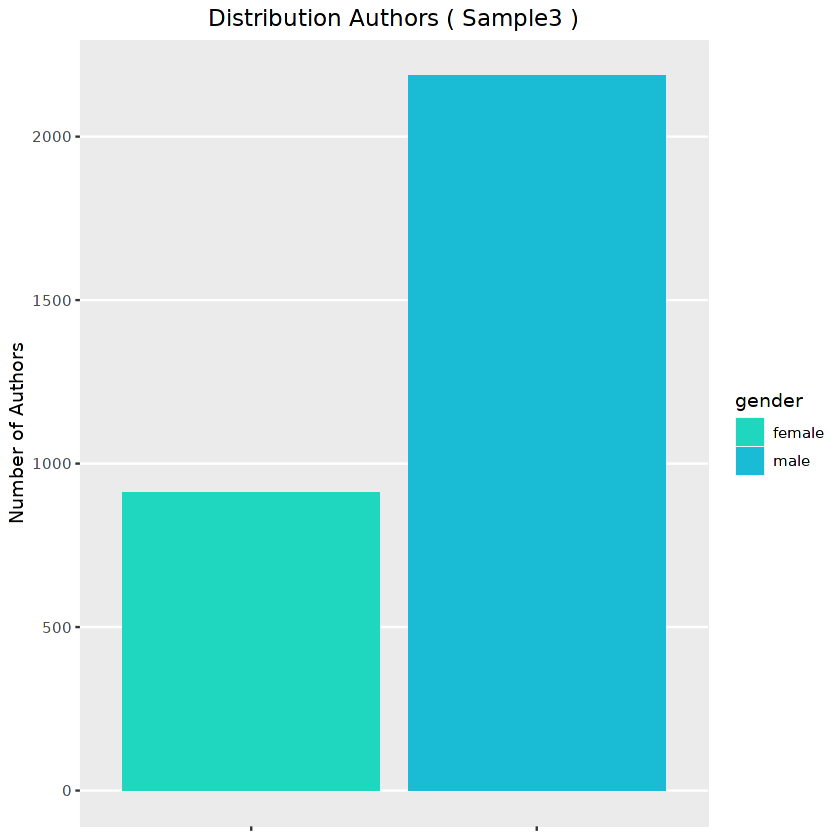

In [36]:
recommendersys(test_sample3, "Sample3")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bf141873-6e10-403a-9377-82382f6c9314' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>